# Day 3 notebook

The objectives of this notebook are to practice
* how data are generated from universal DNA arrays
* how data are generated from a DNA shotgun sequencing experiment
* plotting with matplotlib
* raising and handling exceptions

## The Ebola virus genome

In 2014, an outbreak of the Ebola virus devastated human populations in West Africa, killing more than [11,000 people](https://www.cdc.gov/vhf/ebola/history/2014-2016-outbreak/index.html).  During the outbreak, a group of researchers obtained virus samples from 78 patients, sequenced and assembled the Ebola virus genomes from these samples, and used the genome sequences to identify the origin of the outbreak ([Gire et al. 2014](http://science.sciencemag.org/content/345/6202/1369.long)).  In this notebook, we will work with one of the genome assemblies produced by this study.

The Ebola virus is a negative-sense single-stranded RNA virus.  This means that its genome is actually an RNA, rather than a DNA, molecule.  It has a genome that is in the "negative-sense" orientation, meaning that the mRNAs encoded by the genes in its genome are in the reverse complement orientation.  For this class of viruses, transcription is actually an RNA to RNA process!

Although the virus's genome is an RNA molecule, we will work with it as though it were DNA, as one typically needs to convert from RNA to DNA (via reverse transcription) before using the latest sequencing technologies.

### Problem 1: Reading from a FASTA file (1 POINT)

The genome assembly that we will work with in this notebook is saved in the file `ebola_virus_isolate_G3686.fasta` and was downloaded from its [Genbank record](https://www.ncbi.nlm.nih.gov/nuccore/KM034562).  This file is in [FASTA format](https://en.wikipedia.org/wiki/FASTA_format), one of the most common formats for storing biological sequence data.  To save you some time, I have provided you with a `fasta` module that you can use to read in the viral sequence that is in this file.  In the code block below, use one of the functions from the `fasta` module to read in the name and sequence of the ebola virus genome assembly.

In [1]:
import fasta
help(fasta.read_sequences_from_fasta_file)

Help on function read_sequences_from_fasta_file in module fasta:

read_sequences_from_fasta_file(filename)
    Reads all sequence records from a FASTA-formatted file.
    
    Args:
        filename: the name of the FASTA-formatted file
    Returns:
        A list of records, where each record is represented by a tuple (name, sequence)



Here is an example of the output of the `read_sequences_from_fasta_file` on a small file:

In [2]:
fasta.read_sequences_from_fasta_file("small_fasta_example.fasta")

[('first', 'CGATG'), ('second', 'AGCTACGA'), ('third', 'TGA')]

In the code block below, use the `read_sequences_from_fasta_file` on the Ebola genome FASTA file and assign the name of the viral sequence to the variable `ebola_sequence_name`
and assign the sequence to the variable `ebola_sequence`.

In [3]:
ebola_sequence_filename = "ebola_virus_isolate_G3686.fasta"

### BEGIN SOLUTION
# There is just one sequence record in this file, so we select the first element of the list
ebola_sequence_name, ebola_sequence = fasta.read_sequences_from_fasta_file(ebola_sequence_filename)[0]
### END SOLUTION

In [4]:
# tests for reading in the ebola sequence from a FASTA file
assert isinstance(ebola_sequence_name, str) and len(ebola_sequence_name) == 101, "Failed to assign ebola_sequence_name"
assert isinstance(ebola_sequence, str) and len(ebola_sequence) == 18957, "Failed to assign ebola_sequence"
print("SUCCESS: reading in the ebola sequence from a FASTA file passed all tests!")

SUCCESS: reading in the ebola sequence from a FASTA file passed all tests!


## Simulating universal DNA array data

We will start by generating the sort of data that one would hope to get from a universal DNA array.  Recall that a universal DNA array gives you information about the presence or absence of each possible DNA "$k$-mer", which is a DNA substring of length $k$, within your sample of DNA.  Here, we will assume that we have universal DNA arrays that give us perfect error-free data.  In practice, such arrays are far from perfect, and are no longer used for sequencing purposes.  However, the type of data they generate is useful to think about from a computational perspective.

### Problem 2: $k$-mer spectrum of a DNA sequence (1 POINT)

Write a function `kmer_spectrum` below that takes as input a DNA sequence and a length $k$ and returns a `set` object containing all *unique* $k$-mers within the input sequence, which we will refer to as its "$k$-mer spectrum".  This is an idealized form of the data that a universal DNA array would give us.  For simplicitly, in this activity we will treat a DNA sequence as a single-stranded molecule.  In practice, one would have to handle the fact that DNA is double-stranded.  You may want to get familiar with how to work with Python [`set`](https://docs.python.org/3/library/stdtypes.html#set) objects.

In [5]:
def kmer_spectrum(dna_sequence, k):
    """Gives the k-mer spectrum of a DNA sequence.
    
    Args:
        dna_sequence: a DNA sequence
        k: an integer length
    Returns:
        A set object containing all unique k-mers within dna_sequence
    """
    
    ### BEGIN SOLUTION
    return {dna_sequence[i: i + k] for i in range(0, len(dna_sequence) - k + 1)}
    ### END SOLUTION

In [6]:
# tests for kmer_spectrum
assert kmer_spectrum("ACGTCGA", 3) == {'ACG', 'CGA', 'CGT', 'GTC', 'TCG'}
assert kmer_spectrum("TCTATCT", 3) == {'ATC', 'CTA', 'TAT', 'TCT'}
assert kmer_spectrum("ACGTCGA", 2) == {'AC', 'CG', 'GA', 'GT', 'TC'}
assert kmer_spectrum("AAAAAAA", 2) == {'AA'}
assert kmer_spectrum("T", 3) == set()
print("SUCCESS: kmer_spectrum passed all tests!")

SUCCESS: kmer_spectrum passed all tests!


### Problem 3: $k$-mer spectrum of the Ebola genome sequence (1 POINT)

Use your `kmer_spectrum` function to compute the spectrum for the ebola genome sequence for $k = 1, 2, \ldots, 25$.  Assign to the variable `ebola_spectrum_sizes` a *list* of the *sizes* (number of elements) of these spectra.

In [7]:
k_values = range(1, 26)
### BEGIN SOLUTION
ebola_spectra = [kmer_spectrum(ebola_sequence, k) for k in k_values]
ebola_spectrum_sizes = [len(s) for s in ebola_spectra]
### END SOLUTION

In [8]:
# tests for ebola_spectrum_sizes
assert len(ebola_spectrum_sizes) == 25, "Failed required size"
assert ebola_spectrum_sizes[0] == 4, "Failed on value of first entry"
### BEGIN HIDDEN TESTS
ebola_spectrum_sizes == [
 4,
 16,
 64,
 256,
 1024,
 3799,
 9770,
 15264,
 17746,
 18565,
 18813,
 18891,
 18913,
 18922,
 18928,
 18932,
 18934,
 18935,
 18936,
 18937,
 18937,
 18936,
 18935,
 18934,
 18933]
### END HIDDEN TESTS
print("SUCCESS: ebola_spectrum_sizes passed all tests!")

SUCCESS: ebola_spectrum_sizes passed all tests!


Next let us make a plot of the size of the ebola spectra vs. $k$.  To do this, we will use the Python package [`matplotlib`](https://matplotlib.org/).  For simplicity, we will use the Pyplot interface of this package.  I encourage you to read through the [Pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html).

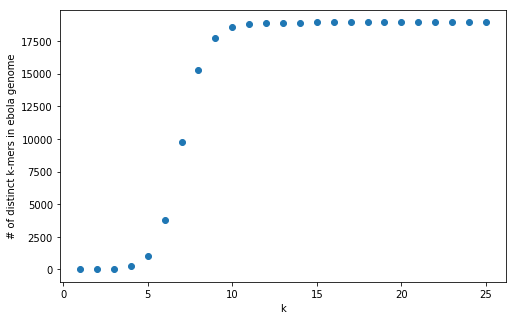

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
plt.plot(k_values, ebola_spectrum_sizes, 'o')
plt.xlabel('k')
plt.ylabel('# of distinct k-mers in ebola genome')
plt.show()

Examine the plot above.  
* Why does it have this shape?
* For which value of $k$ are all $k$-mers in the Ebola genome unique?  
* Is this value of $k$ surprising?
Talk with your neighbors and write your thoughts about these questions below.

### BEGIN SOLUTION TEMPLATE=your thoughts here
For small k, all (or close to all) k-mers are present in the genome, and therefore the curve looks like the exponential function $f(k) = 4^k$.  For $k = 8$, the number of possible k-mers exceeds the number of length k substrings in the genome (which is $len(genome) - k + 1$), and the curve starts to level off.  However, it is not until $k = 21$ that all length $k$ substrings in the genome are unique.  This is somewhat surprising but indicates that there must be some slightly repetitive sequences in the genome.
### END SOLUTION

In [10]:
### BEGIN SOLUTION TEMPLATE=
max_kmers = [len(ebola_sequence) - k + 1 for k in k_values]
all_unique = [num_kmers == max_num_kmers 
              for num_kmers, max_num_kmers in zip(ebola_spectrum_sizes, max_kmers)]
list(zip(k_values, all_unique))
### END SOLUTION

[(1, False),
 (2, False),
 (3, False),
 (4, False),
 (5, False),
 (6, False),
 (7, False),
 (8, False),
 (9, False),
 (10, False),
 (11, False),
 (12, False),
 (13, False),
 (14, False),
 (15, False),
 (16, False),
 (17, False),
 (18, False),
 (19, False),
 (20, False),
 (21, True),
 (22, True),
 (23, True),
 (24, True),
 (25, True)]

## Simulating reads from a DNA shotgun sequencing experiment

Recall that a DNA shotgun sequencing experiment involves three steps to generate read data:
1. Fragmentation of many identical copies of the DNA of interest.
2. Random sampling of a subset of the resulting DNA fragments.
3. Sequencing a read of limited length from one end from each of the sampled fragments.

We will write functions to model each aspect of this proecss and then put them all together to simulate a set of reads from a DNA shotgun sequencing experiment.

### PROBLEM 4 - Fragmentation simulation (1 POINT)

We will first model the fragmentation of the DNA sequence, for which we have a very large number of identical copies.  Each copy of the DNA will be fragmented randomly, likely resulting in a unique fragmentation pattern for each DNA molecule.  Fragmentation is a complex process to model, however, for the purposes of this activity, we will simulate it in a very simple manner, by choosing `k` distinct positions along a given DNA molecule at which to cut the molecule.  Each cut position will be chosen randomly and uniformly across the entire DNA molecule.  We will specify the cut position by the index (0-based) of the base to the *right* of the cut.

Write a function that takes as input the length of the DNA sequence that is to be fragmented and the number of positions, `k`, at which to cut the DNA, and returns a *sorted* list of the intervals of the resulting DNA fragments.  Each interval should be specified by a tuple, of the form `(start, end)`, which will represent the fragment of DNA beginning at `start` (0-based coordinates) and spanning up to, **but not including**, `end` (another way to think about it is that these are the indices that you would use to slice the Python string to obtain the fragment's sequence).

To generate random cut points, you will use the pseuodorandom number generating functionality provided by Python's [random module](https://docs.python.org/3/library/random.html).  For the purposes of being to able to test your code, you will need to use **a single call** of the [`random.sample`](https://docs.python.org/3/library/random.html#random.sample) function to randomly generate all of the cut points simultaneously within your function.

In [11]:
import random
def fragment_dna(length, k):
    """Randomly cuts a sequence of a given length into k fragments.
    
    Args:
        length: an integer specifying the length of the sequence
        k: the number of fragments that should result from random cuts
    Returns:
        A sorted list of fragment intervals, where each interval
        is specified as a tuple (start, end).  For each interval, 
        the coordinates are 0-based and the end coordinate  
        *not* included in the fragment.
    """
    
    ### BEGIN SOLUTION
    cut_positions = random.sample(range(1, length), k = k)
    endpoints = [0] + sorted(cut_positions) + [length]
    intervals = [tuple(endpoints[i: i + 2]) for i in range(len(endpoints) - 1)]
    return intervals
    ### END SOLUTION

In [12]:
# tests for fragment_dna
# We will use the seed function to reset the pseudorandom number generator to a specific state
# so that we can test inputs with known outputs
def fragment_dna_with_seed(length, k, seed):
    random.seed(seed)
    return fragment_dna(length, k)
assert fragment_dna_with_seed(100, 3, 42) == [(0, 4), (4, 15), (15, 82), (82, 100)], "Failed on 100, 3 (seed 42)"
assert fragment_dna_with_seed(100, 2, 43) == [(0, 5), (5, 37), (37, 100)], "Failed on 100, 3 (seed 43)"
assert fragment_dna_with_seed(100, 1, 44) == [(0, 53), (53, 100)], "Failed on 100, 3 (seed 44)"
assert fragment_dna_with_seed(100, 0, 45) == [(0, 100)], "Failed on 100, 3 (seed 45)"
assert fragment_dna_with_seed(5, 4, 46) == [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)], "Failed on 5, 4 (seed 46)"
print("SUCCESS: fragment_dna passed all tests!")

SUCCESS: fragment_dna passed all tests!


For your convenience, below is a function that will fragment multiple copies of a genome of a given length and return a list with all fragment intervals combined and sorted.

In [13]:
def fragment_multiple_dna_copies(length, k, num_copies):
    """Randomly cuts multiple sequences of a given length, each sequence
    cut into k fragments.
    
    Args:
        length: an integer specifying the length of each sequence
        k: the number of fragments that should result from each sequence
        num_copies: the number of sequences
    Returns:
        A sorted list of fragment intervals from all sequences, where intervals
        are represented in the same way as for the fragment_dna function.
    """
     
    intervals = []
    for i in range(num_copies):
        intervals.extend(fragment_dna(length, k))
    return sorted(intervals)

### PROBLEM 5 - Filtering fragments (1 POINT)

We will next model the random sampling of a set of fragments to be sequenced by our sequencing technology of chioce.  Typically, only fragments longer than a certain minimum length will be sequenceable, so we will first filter the set of possible fragments by length before selecting a subset.

Let us first write a function that filters fragments by length.  This function should take a list of fragment intervals (as would be produced by `fragment_multiple_dna_copies`) and a minimum length and returns a *new* list that contains only those intervals whose lengths are at least the minimum, in the same order as they appeared in the input list.

You might consider using a list comprehension with an `if` clause for this purpose.  Alternatively, you might consider using the [`filter`](https://docs.python.org/3/library/functions.html#filter) higher-order function with a [`lambda`](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions) expression.

In [14]:
def filter_for_long_fragments(fragment_list, min_length):
    """Returns a list of all fragments that are at least as long as a
    given minimum length.

    Args:
        fragment_list: a list of fragments, in the format returned by fragment_dna
        min_length: the minimum length of a fragment to return in the output
    Returns:
        A list of fragments.
    """    
    
    ### BEGIN SOLUTION
    return [frag for frag in fragment_list if frag[1] - frag[0] >= min_length]
    ### END SOLUTION

In [15]:
# tests for filter_for_long_fragments
test_fragment_list = [(0, 4), (4, 15), (15, 82), (82, 100)]
assert filter_for_long_fragments(test_fragment_list, 20) == [(15, 82)], "Failed for min_length = 20"
assert filter_for_long_fragments(test_fragment_list, 5) == [(4, 15), (15, 82), (82, 100)], "Failed for min_length = 5"
assert filter_for_long_fragments(test_fragment_list, 0) == test_fragment_list, "Failed for min_length = 0"
assert filter_for_long_fragments(test_fragment_list, 100) == [], "Failed for min_length = 100"
print("SUCCESS: filter_for_long_fragments passed all tests!")

SUCCESS: filter_for_long_fragments passed all tests!


### PROBLEM 6 - Sampling fragments (1 POINT)
Next, we will write a function to sample fragments.  We will again use the `random.sample` function from the `random` module.  Note that this function raises an exception if you ask it to sample more elements than are present in the sequence input (since it samples *without* replacement).  For example,

In [16]:
try:
    random.sample([1, 2, 3, 4], 6)
except Exception as err:
    print(err)

Sample larger than population or is negative


This error is not as user-friendly as we might like it to be for someone who is using our functions to randomly sample DNA fragments from a large pool of DNA fragments.  Let us remedy this by explicitly checking that the number of fragments requested is smaller than the size of the pool and if it is not, raising a `ValueError` exception with a more informative message.  Let the format of the error message be `"The number of fragments to be sampled (INSERT_NUM_FRAGMENTS_HERE) is larger than the fragment pool (INSERT_FRAGMENT_LIST_LENGTH_HERE)`".

In [17]:
def sample_fragments(fragment_list, num_fragments):
    """Randomly samples a specified number of fragments from a 
    a list of fragments without replacement.
    
    Args:
        fragment_list: a list of fragments, in the format returned by fragment_dna
        num_fragments: the number of fragments to randomly sample from the list
    Returns:
        A sorted list of fragments.
    """
    
    # Check for num_fragments being valid
    ### BEGIN SOLUTION
    if num_fragments > len(fragment_list):
        raise ValueError("The number of fragments to be sampled (%d) is larger than the fragment pool (%d)" %
                         (num_fragments, len(fragment_list)))
    ### END SOLUTION
    return sorted(random.sample(fragment_list, num_fragments))

In [18]:
# tests for sample_fragments
test_fragment_list = [(0, 4), (4, 15), (15, 82), (82, 100)]
random.seed(42)
assert sample_fragments(test_fragment_list, 2) == [(0, 4), (82, 100)]
random.seed(42)
assert sample_fragments(test_fragment_list, 4) == [(0, 4), (4, 15), (15, 82), (82, 100)]

# The tests below check that you are raising an exception properly
random.seed(42)
try:
    sample_fragments(test_fragment_list, 5)
except ValueError as err:
    assert str(err) == "The number of fragments to be sampled (5) is larger than the fragment pool (4)", "Failed to raise the correct error message"
except Exception as err:
    raise AssertionError("Raised something other than a ValueError")
else:
    raise AssertionError("Failed to raise an exception with num_fragments = 5")
print("SUCCESS: sample_fragments passed all tests!")

SUCCESS: sample_fragments passed all tests!


### PROBLEM 7 - Sequencing fragments (1 POINT)
Finally, a sequencer will be applied to the sampled fragments to read one or both of its ends. We will assume that we are using a sequencing technology (such as Illumina) that reads a fixed length from one strand of the fragment starting at the 5' end of that strand and reading in the 5' to 3' direction.  Thus, the end of the fragment that is sequenced depends on which strand is chosen.  We will assume that for each fragment independently, the strand that is sequenced is chosen at random.

Write a function `read_fragment` that takes as input a fragment interval and a maximum read length and returns an "oriented" read interval `(start, end, strand)` representing the interval of the genome that is read by the sequencer and the orientation (strand) of that read.  For example, with a read length of 100 the fragment interval (500, 800) would result in an oriented read interval of either `(500, 600, +)` or `(700, 800, -)`.  We will use `+` to represent the forward strand (the strand whose sequence is represented by the genome string) and `-` to represent the reverse strand.

In [19]:
def read_fragment(fragment, read_length):
    """Returns the interval sequenced from one end of a given fragment, 
    given a maximum read length and a randomly sampled orientation.
    
    Args:
        fragment: a fragment, represented as a tuple (start, end)
        read_length: the maximum length of a read
    Returns:
        The interval of the read, represented as a tuple (start, end, orientation),
        where orientation is "+" for a forward strand read and "-" for a reverse strand
        read. If the fragment is shorter than the maximum read length, the entire fragment
        is read.
    """
    
    strand = random.choice("+-")
    ### BEGIN SOLUTION
    actual_read_length = min(read_length, fragment[1] - fragment[0])
    if strand == "+":
        return (fragment[0], fragment[0] + actual_read_length, strand)
    else:
        return (fragment[1] - actual_read_length, fragment[1], strand)
    ### END SOLUTION

In [20]:
# tests for read_fragment
random.seed(42)
assert read_fragment((500, 800), 100) == (500, 600, '+'), "Failed on (500, 800), 100 (seed 42)"
random.seed(44)
assert read_fragment((500, 800), 100) == (700, 800, '-'), "Failed on (500, 800), 100 (seed 44)"
random.seed(42)
assert read_fragment((500, 800), 400) == (500, 800, '+'), "Failed on (500, 800), 400 (seed 42)"
print("SUCCESS: read_fragment passed all tests!")

SUCCESS: read_fragment passed all tests!


### Problem 8 - Putting it all together: simulating shotgun sequencing oriented read intervals (1 POINT)

We will now put all of the functions you have written for simulating fragmentation, filtering fragments by length, random selection, and fragment sequencing together.  Write a function below to do this using the documentation string
as the specificiation.

In [21]:
def simulate_shotgun_sequencing_read_intervals(genome_length, 
                                               num_copies, 
                                               k,
                                               min_fragment_length,
                                               num_fragments, 
                                               read_length):
    """Simulates shotgun sequence read intervals.
    
    Args:
        genome_length: the integer length of the DNA sequence
        num_copies: the number of identical copies of the DNA in the sample
        k: the number of cuts in each DNA during fragmentation
        min_fragment_length: the minimum length of a fragment to be sequenced
        num_fragments: the number of fragments to sequence
        read_length: the length of the reads
    Returns:
        A list of oriented read intervals, each represented as a tuple (start, end, orientation)
    """    
    
    ### BEGIN SOLUTION
    all_fragments = fragment_multiple_dna_copies(genome_length, k, num_copies)
    all_long_fragments = filter_for_long_fragments(all_fragments, min_fragment_length)
    sampled_fragments = sample_fragments(all_long_fragments, num_fragments)
    read_intervals = [read_fragment(fragment, read_length) for fragment in sampled_fragments]
    return read_intervals
    ### END SOLUTION

In [22]:
# tests for simulate_shotgun_sequencing_read_intervals
random.seed(42)
assert simulate_shotgun_sequencing_read_intervals(genome_length = 100,
                                                  num_copies = 10,
                                                  k = 5,
                                                  min_fragment_length = 10,
                                                  num_fragments = 3,
                                                  read_length = 10) == [(34, 44, '-'), (36, 46, '+'), (77, 87, '-')]
print("SUCCESS: simulate_shotgun_sequencing_read_intervals passed all tests!")

SUCCESS: simulate_shotgun_sequencing_read_intervals passed all tests!


### Simulating read intervals from the Ebola genome
Let us use our function from the last section to simulate some read intervals along the Ebola genome.

In [23]:
simulated_ebola_read_intervals = simulate_shotgun_sequencing_read_intervals(
    genome_length = len(ebola_sequence),
    num_copies = 10000,
    k = 10,
    min_fragment_length = 300,
    num_fragments = 1000,
    read_length = 100)

A common feature to examine in shotgun sequencing data is the "read coverage" distribution, which is how many reads cover (overlap) each position along the genome.  Below is a function that you can use to quickly compute read coverage given a list of oriented read intervals.

In [24]:
def read_coverage(read_intervals, genome_length):
    """Computes the number of reads covering (overlapping) each position
    along the genome.
    
    Args:
        read_intervals: a list of oriented read intervals
        genome_length: the integer length of the genome sequence
    Returns:
        A list of coverage values with the ith entry in the list giving
        the read coverage at position i in the genome.
    """    
    num_reads_starting = [0] * genome_length
    num_reads_ending = [0] * genome_length
    for start, end, strand in read_intervals:
        num_reads_starting[start] += 1
        num_reads_ending[end - 1] += 1
    coverage = [0] * genome_length
    coverage[0] = num_reads_starting[0]
    for i in range(1, genome_length):
        coverage[i] = coverage[i - 1] - num_reads_ending[i - 1] + num_reads_starting[i] 
    return coverage

And here is a function to plot the read coverage.

In [25]:
def plot_read_coverage(coverage):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16,4))
    plt.plot(range(len(coverage)), coverage)
    plt.xlabel('position along Ebola genome')
    plt.ylabel('# of reads covering position')
    plt.show()

Now let us compute and plot the read coverage across the genome.

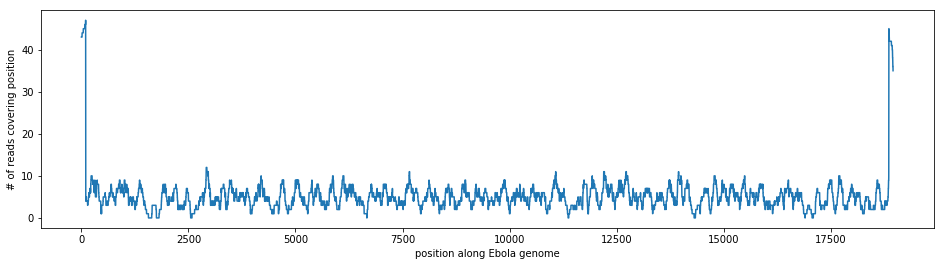

In [26]:
simulated_ebola_read_coverage = read_coverage(simulated_ebola_read_intervals, len(ebola_sequence))
plot_read_coverage(simulated_ebola_read_coverage)

Examine the plot above and discuss the following questions with your neighbors:  
* Why does it have this shape?
* Try changing the parameters of the simulation slightly.  Which parameters have the greatest effect on the read coverage distribution?
* What might be important about this distribution for the purposes of assembling the genome?
Write your thoughts about these questions below.

### BEGIN SOLUTION TEMPLATE=WRITE YOUR THOUGHTS HERE
The bumpiness of the curve in the middle is due to the random sampling process.  The spikes at the ends are due to the fact that reads are generated close to cut points, and the ends of the of the genome are effectively cut points that are present in every fragmented genome, in contrast to each possible internal cut point, which is only selected on occasion. The read coverage distribution is greatly affected by the number of sampled fragments, as well as the read length.  The important aspects of this curve are how close it comes to zero at any given position along the genome.  The genome can only be assembled if every position is covered by a read, and ideally each position is covered by multiple reads.
### END SOLUTION

### Problem 9 - Read intervals to read sequences (1 POINT)

Although it has been convenient and efficent to work with read intervals, we will ultimately want to simulated actual read sequences, which will be the input to a genome assembly method.  For simplicity, we assume that the sequencer is error free.  Later, we will consider how sequencing errors might occur and complicate the assembly task.

Write a function that takes as input the genome sequence and a single oriented read interval and outputs the DNA  sequence of the read for the given interval and orientation.  You will need to use your `reverse_complement` function from the Day 1 notebook.

In [27]:
def sequence_for_read_interval(read_interval, genome_sequence):
    """Returns the sequence of a read given its oriented interval along
    a genome sequence.
    
    Args:
        read_interval: an oriented read interval, represented as a tuple (start, end, orientation)
        genome_sequence: the genome sequence as a string
    Returns:
        The sequence of the read as a string.
    """    
    
    ### BEGIN SOLUTION
    start, end, strand = read_interval
    forward_strand_read = genome_sequence[start: end]
    if strand == "+":
        return forward_strand_read
    else:
        return reverse_complement(forward_strand_read)
    ### END SOLUTION
    
# You will likely want to use your reverse_complement function from day 1
# which you can paste below
### BEGIN SOLUTION
complement_trans = str.maketrans("ACGT", "TGCA")
def reverse_complement(s):
    return ''.join(reversed(s.translate(complement_trans)))
### END SOLUTION

In [28]:
# tests for sequence_for_read_interval
assert sequence_for_read_interval((0, 5, '+'), "CGATGCTTAA") == 'CGATG', "Failed on (0, 5, '+')"
assert sequence_for_read_interval((0, 5, '-'), "CGATGCTTAA") == 'CATCG', "Failed on (0, 5, '-')"
assert sequence_for_read_interval((4, 10, '+'), "CGATGCTTAA") == 'GCTTAA', "Failed on (4, 10, '+')"
assert sequence_for_read_interval((4, 10, '-'), "CGATGCTTAA") == 'TTAAGC', "Failed on (4, 10, '-')"
print("SUCCESS: sequence_for_read_interval passed all tests!")

SUCCESS: sequence_for_read_interval passed all tests!


### Putting it all together: simulating shotgun sequencing read sequences

For completeness, Below you are provided with a function that puts all of your work above together and simulates a set of read sequences for shotgun sequencing given a genome sequence.

In [29]:
def simulate_shotgun_sequencing_reads(genome_sequence, 
                                      num_copies, 
                                      k,
                                      min_fragment_length,
                                      num_fragments, 
                                      read_length):
    """Simulates shotgun sequence reads from a genome.
    
    Args:
        genome_sequence: the genome sequence as a string
        num_copies: the number of identical copies of the DNA in the sample
        k: the number of cuts in each DNA during fragmentation
        min_fragment_length: the minimum length of a fragment to be sequenced
        num_fragments: the number of fragments to sequence
        read_length: the length of the reads
    Returns:
        A list of read sequences.
    """    
    
    read_intervals = simulate_shotgun_sequencing_read_intervals(len(genome_sequence),
                                                                num_copies,
                                                                k,
                                                                min_fragment_length,
                                                                num_fragments,
                                                                read_length)
    reads = [sequence_for_read_interval(interval, genome_sequence)
             for interval in read_intervals]
    return reads

Let's try simulating from the Ebola genome to see what sequencing data look like.  For example,

In [30]:
simulate_shotgun_sequencing_reads(
    genome_sequence = ebola_sequence,
    num_copies = 10000,
    k = 10,
    min_fragment_length = 300,
    num_fragments = 10,
    read_length = 30)

['TTCTCTTAATGTTTCTCCCACTAGATACTG',
 'CTTGGACTTGATGATCAGGAAAAGAAAATT',
 'CTCCCCGATTGTTGTATCAATTTCGGGGTT',
 'AAGCTGTAGGTCTTTTGATCAGCGACACCT',
 'AACATTTTCCATCCCGCTTGGAGTTATCCA',
 'GCATTTTATCACTAGAAATCCAATATACGA',
 'CTAGAATTTGCAATCGCTTCCCGCTCGGCG',
 'AGGTCAAAACCTTTATTAAATCCGAGGTGA',
 'GAGCAGGAACAGAGCGCCGAGGACAATGCA',
 'GACACACAAAAAAGAAGAAATAGATTTATT']